# Experimental data

In [39]:
import torch
import pyro
import pyro.distributions as dist
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from cosmos.models import Tracker

In [2]:
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)


In [3]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix, \
                            precision_score, recall_score, \
                            roc_curve

from scipy.io import loadmat

## Orange dye non-attenuated data

Tracker v1.1.3flat

In [20]:
results = {}
predictions = {}
true_labels = {}
snr = []

names = ["FL_5555_6684_1p3OD", "FL_4445_5554_1p1OD", "FL_3339_4444_0p8OD",
         "FL_2226_3338_0p6OD", "FL_1118_2225_0p3OD", "FL_1_1117_0OD"]

for name in names:
    path_data = "/shared/centaur/data/experimental/nonattenuated/{}".format(name)
    path_params = os.path.join(path_data, "runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs10")
    results[name] = pd.read_csv(
        os.path.join(path_params, "params_last.csv"),
        header=None, squeeze=True, index_col=0)
    predictions[name] = np.load(
        os.path.join(path_params, "predictions.npy"))
    true_labels[name] = np.load(os.path.join(path_data, "labels.npy"))
    
    model = Tracker(S=1)
    model.load(path_data, False, "cpu")
    model.load_parameters(path_params)
    snr.append(float(model.snr().mean()))

In [21]:
df = pd.DataFrame(data=results).T.drop(columns=[float("nan"), "pi_0", "lamda_0", "width_mode_0", "width_size_0"])
df["SNR"] = snr
df

0                      iter       -ELBO      gain      pi_1   lamda_1  \
FL_5555_6684_1p3OD  29900.0  40515940.0  6.852407  0.038298  0.031055   
FL_4445_5554_1p1OD  29900.0  30591322.0  6.725662  0.101534  0.023240   
FL_3339_4444_0p8OD  29900.0  36886452.0  6.634371  0.074356  0.015539   
FL_2226_3338_0p6OD  29900.0  43654948.0  6.926970  0.098242  0.075726   
FL_1118_2225_0p3OD  29900.0  45101560.0  6.566349  0.031429  0.038498   
FL_1_1117_0OD       29900.0  49636644.0  6.729361  0.030443  0.090154   

0                        MCC    Recall  Precision    FN      TP       TN  \
FL_5555_6684_1p3OD  0.915697  0.905947   0.929078  68.0   655.0  33728.0   
FL_4445_5554_1p1OD  0.964020  0.967828   0.964596  48.0  1444.0  22999.0   
FL_3339_4444_0p8OD  0.895820  0.975260   0.828540  19.0   749.0  26324.0   
FL_2226_3338_0p6OD  0.961233  0.962511   0.964690  83.0  2131.0  33921.0   
FL_1118_2225_0p3OD  0.927009  0.929752   0.927198  51.0   675.0  35441.0   
FL_1_1117_0OD       0.899000  0.878672   0.923490  95.0   688.0  41842.0   

0                      FP       SNR  
FL_5555_6684_1p3OD   50.0  1.688353  
FL_4445_5554_1p1OD   53.0  1.630696  
FL_3339_4444_0p8OD  155.0  1.269961  
FL_2226_3338_0p6OD   78.0  1.607510  
FL_1118_2225_0p3OD   53.0  1.473022  
FL_1_1117_0OD        57.0  1.449292

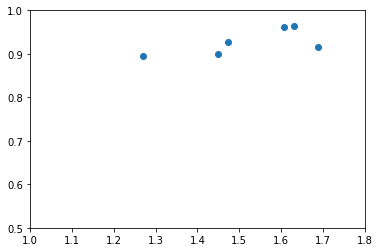

In [27]:
plt.plot(df["SNR"], df["MCC"], "o")
plt.xlim(1,1.8)
plt.ylim(0.5,1)
plt.show()

## Orange dye attenuated data

In [34]:
snr = np.array([0.63, 0.79, 1.12, 1.41, 1.99, 2.81]) * 1.6 / 2.81

Tracker v1.1.3

In [33]:
results = {}
predictions = {}
true_labels = {}
snr = []

names = ["FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob", "FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob",
         "FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob", "FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob",
         "FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob", "FL_1_1117_0OD_atten_noHysteresis_0p5_prob"]

for name in names:
    path_data = "/shared/centaur/data/experimental/attenuated/{}".format(name)
    path_params = os.path.join(path_data, "runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs10")
    results[name] = pd.read_csv(
        os.path.join(path_params, "params_last.csv"),
        header=None, squeeze=True, index_col=0)
    predictions[name] = np.load(
        os.path.join(path_params, "predictions.npy"))
    true_labels[name] = np.load(os.path.join(path_data, "labels.npy"))
    
    # model = Tracker(S=1)
    # model.load(path_data, False, "cpu")
    # model.load_parameters(path_params)
    # snr.append(float(model.snr().mean()))

In [35]:
scores_v1p13 = pd.DataFrame(data=results).T.drop(columns=[float("nan"), "pi_0", "lamda_0", "width_mode_0", "width_size_0"])
scores_v1p13["SNR"] = snr
scores_v1p13

0                                                  iter       -ELBO      gain  \
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob  29900.0  27305760.0  1.769059   
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob  29900.0  20433688.0  2.877008   
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob  29900.0  25251286.0  5.252812   
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob  29900.0  31451082.0  6.725665   
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob  29900.0  36758332.0  6.801042   
FL_1_1117_0OD_atten_noHysteresis_0p5_prob       29900.0  44042968.0  6.901953   

0                                                   pi_1   lamda_1       MCC  \
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob  0.003534  0.026631  0.389858   
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob  0.014074  0.027418  0.502883   
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob  0.023329  0.002412  0.721728   
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob  0.073904  0.008817  0.927197   
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob  0.042468  0.017617  0.941185   
FL_1_1117_0OD_atten_noHysteresis_0p5_prob       0.040881  0.093299  0.880256   

0                                                 Recall  Precision      FN  \
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob  0.163389   0.947368   553.0   
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob  0.266805   0.992268  1058.0   
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob  0.591700   0.894737   305.0   
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob  0.890618   0.973711   232.0   
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob  0.974702   0.910987    17.0   
FL_1_1117_0OD_atten_noHysteresis_0p5_prob       0.980422   0.793902    13.0   

0                                                   TP       TN     FP  \
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob   108.0  33744.0    6.0   
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob   385.0  23013.0    3.0   
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob   442.0  26305.0   52.0   
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob  1889.0  33878.0   51.0   
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob   655.0  35391.0   64.0   
FL_1_1117_0OD_atten_noHysteresis_0p5_prob        651.0  41700.0  169.0   

0                                                    SNR  
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob  0.358719  
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob  0.449822  
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob  0.637722  
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob  0.802847  
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob  1.133096  
FL_1_1117_0OD_atten_noHysteresis_0p5_prob       1.600000

In [36]:
scores_sp = pd.DataFrame(data={"spMCC": [matthews_corrcoef(true_labels[name]["z"][true_labels[name]["z"]<2], true_labels[name]["spotpicker"][true_labels[name]["z"]<2]) for name in names],
                   "spRecall": [recall_score(true_labels[name]["z"][true_labels[name]["z"]<2], true_labels[name]["spotpicker"][true_labels[name]["z"]<2]) for name in names],
                   "spPrecision": [precision_score(true_labels[name]["z"][true_labels[name]["z"]<2], true_labels[name]["spotpicker"][true_labels[name]["z"]<2]) for name in names],
                    },
             index=names)
scores_sp

spMCC  spRecall  \
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob  0.426138  0.211800   
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob  0.480272  0.244629   
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob  0.674511  0.514056   
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob  0.893359  0.857614   
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob  0.910230  0.962798   
FL_1_1117_0OD_atten_noHysteresis_0p5_prob       0.840818  0.980422   

                                                spPrecision  
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob     0.875000  
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob     0.988796  
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob     0.901408  
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob     0.942976  
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob     0.863818  
FL_1_1117_0OD_atten_noHysteresis_0p5_prob          0.725753

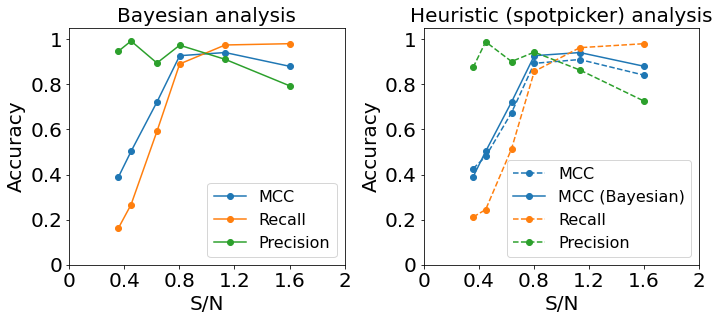

In [40]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.plot(snr, scores_v1p13["MCC"], "o-", label="MCC")
plt.plot(snr, scores_v1p13["Recall"], "o-", label="Recall")
plt.plot(snr, scores_v1p13["Precision"], "o-", label="Precision")

plt.ylim(0,1.05)
plt.xlim(0,1)
plt.xlabel(r"S/N", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.title(r"Bayesian analysis", fontsize=20)

plt.gca().axes.get_xaxis().set_ticks(np.arange(6)*0.4)
plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=16)

plt.subplot(222)
plt.plot(snr, scores_sp["spMCC"], "o--", label="MCC")
plt.plot(snr, scores_v1p13["MCC"], "o-", color="C0", label="MCC (Bayesian)")
plt.plot(snr, scores_sp["spRecall"], "o--", label="Recall")
plt.plot(snr, scores_sp["spPrecision"], "o--", label="Precision")
plt.ylim(0,1.05)
plt.xlim(0,1)
plt.xlabel(r"S/N", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.title(r"Heuristic (spotpicker) analysis", fontsize=20)

plt.gca().axes.get_xaxis().set_ticks(np.arange(6)*0.4)
plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=16)


plt.tight_layout()
plt.show()

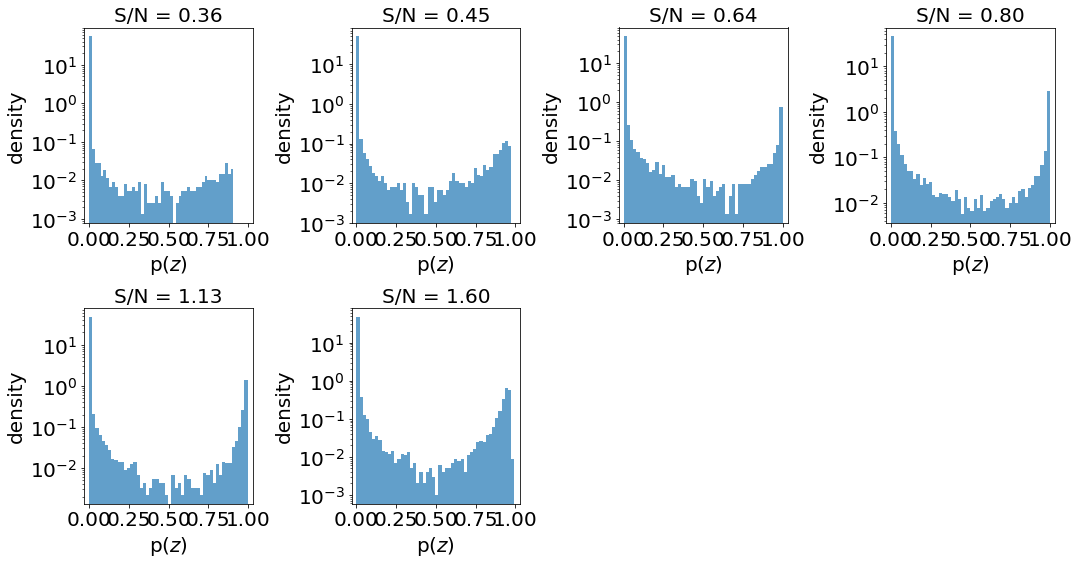

In [43]:
plt.figure(figsize=(15,15))
for i, name in enumerate(names):
    plt.subplot(4, 4, i+1)
    plt.hist(predictions[name]["z_prob"].ravel(), bins=50, density=True, alpha=0.7)
    plt.xlim(-0.03, 1.03)
    #plt.ylim(0, 10)
    plt.yscale('log', nonpositive='clip')
    #plt.gca().axes.get_xaxis().set_ticks([0.8, 0.9, 1])
    #plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.xlabel(r"p($z$)", fontsize=20)
    plt.ylabel(r"density", fontsize=20)
    plt.title(r"S/N = {:.2f}".format(snr[i]), fontsize=20)

plt.tight_layout()
plt.show()